In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.DataFrame()
df["rain"] = pd.read_csv("../../../tests/rex_rain.csv")["value"]
df["evap"] = pd.read_csv("../../../tests/rex_mpot.csv")["value"]
df["scaled_rain"] = df["rain"] * 1.72036997687526
df.head()

,rain,evap,scaled_rain
0,0.6,5.725000,1.032222
1,2.5,5.720000,4.300925
2,0.5,5.716667,0.860185
3,3.2,5.728571,5.505184
4,0.3,5.700000,0.516111


In [12]:
%run gr4j.py

params = {
    "X1": 1999.99999999996, #[100, 1200]
    "X2": 5.99999999999991, #[-5, 3]
    "X3": 65.2245666006408, #[20, 300]
    "X4": 0.380800595584489, #[1.1, 2.9]
}


df["runoff_mm"] = gr4j(df["scaled_rain"], df["evap"], params)
df["flow"] = df["runoff_mm"] * 22.8
print(df.describe())
df

              rain          evap   scaled_rain     runoff_mm          flow
count  48824.00000  48824.000000  48824.000000  48824.000000  48824.000000
mean       6.36333      5.147112     10.947281     10.962724    249.950114
std       21.17319      1.398766     36.425721     22.150838    505.039098
min        0.00000      1.428571      0.000000      0.000000      0.000000
25%        0.00000      3.985714      0.000000      3.496560     79.721562
50%        0.00000      5.028571      0.000000      5.777513    131.727287
75%        3.00000      6.300000      5.161110     10.701786    244.000730
max      742.70000      9.300000   1277.718782   1147.721764  26168.056212


,rain,evap,scaled_rain,runoff_mm,flow
0,0.6,5.725000,1.032222,0.000000,0.000000
1,2.5,5.720000,4.300925,0.000000,0.000000
2,0.5,5.716667,0.860185,0.000000,0.000000
3,3.2,5.728571,5.505184,0.000000,0.000000
4,0.3,5.700000,0.516111,0.000000,0.000000
...,...,...,...,...,...
48819,4.5,2.642857,7.741665,9.510372,216.836478
48820,1.7,3.100000,2.924629,8.093034,184.521182
48821,13.9,3.216667,23.913143,10.853639,247.462973
48822,0.2,3.440000,0.344074,8.996002,205.108854


# Another test

In [56]:
%run gr4j.py

params = {
    "X1": 350, #[100, 1200]
    "X2": 0, #[-5, 3]
    "X3": 90, #[20, 300]
    "X4": 1.7, #[1.1, 2.9]
}

precip = [20, 20, 20, 20, 0, 
    0, 5, 2, 0, 50, 
    0, 0, 0, 18, 0
]

potential_evap = [
    5, 5, 5, 5, 5,
    4, 4, 4, 4, 4,
    5, 5, 5, 5, 5, 
]

q = gr4j(precip, potential_evap, params)
q

[0.00012177789689547126,
 0.001364014742718896,
 0.006154734942327555,
 0.016036312834266125,
 0.023938910695293348,
 0.010122569930529105,
 0.0008431392654608832,
 0.0015330282607797256,
 0.0008245331425899391,
 0.031187662973283365,
 0.13132156963427596,
 0.06940200250631864,
 0.003650420037997223,
 0.014162026333384349,
 0.058270609002816956]

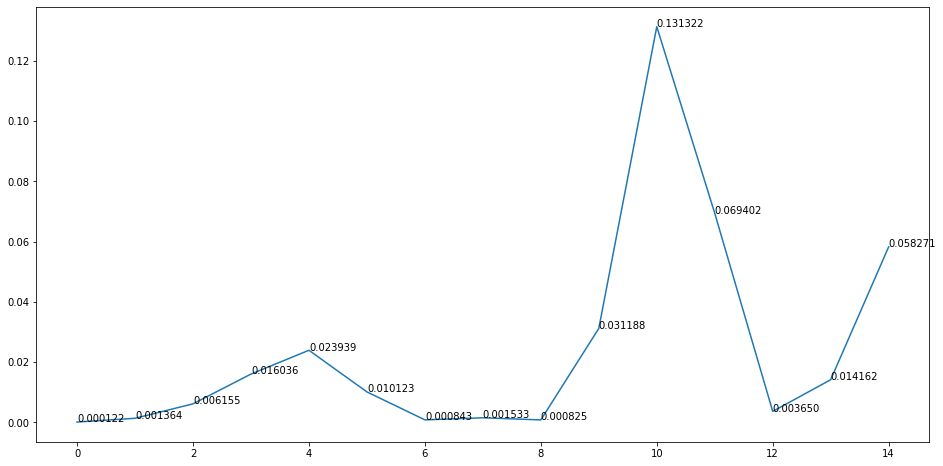

In [55]:
plt.rcParams["figure.figsize"] = (16,8)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(0,10)
x = [i for i in range(0,15)]
plt.plot(x, q)
for i,j in zip(x,q):
    ax.annotate(f"{q[i]:f}",xy=(i,j)) #"For only {price:.2f} dollars!"

plt.show()